In [13]:
import numpy as np
import pandas as pd

def generate_synthetic_data(num_samples=2000):
    """
    Generate synthetic dataset for SpO2 and Heart Rate with labels:
    0: Normal, 1: Mild Hypoxia, 2: Severe Hypoxia.

    Args:
        num_samples (int): Total number of samples.

    Returns:
        pd.DataFrame: Synthetic dataset with SpO2, Heart Rate, and labels.
    """
    # Define number of samples for each category
    samples_per_category = num_samples // 3

    # Define ranges for each category
    normal_spo2 = np.random.uniform(95, 100, samples_per_category)
    mild_spo2 = np.random.uniform(90, 94, samples_per_category)
    severe_spo2 = np.random.uniform(85, 89, samples_per_category)

    normal_hr = np.random.uniform(60, 100, samples_per_category)
    mild_hr = np.random.uniform(50, 110, samples_per_category)
    severe_hr = np.random.uniform(40, 120, samples_per_category)

    # Concatenate data
    spo2 = np.concatenate([normal_spo2, mild_spo2, severe_spo2])
    heart_rate = np.concatenate([normal_hr, mild_hr, severe_hr])
    labels = np.array([0] * samples_per_category + [1] * samples_per_category + [2] * samples_per_category)

    # Shuffle data
    indices = np.random.permutation(len(spo2))  # Use np.random.permutation to shuffle indices
    spo2_shuffled = spo2[indices]
    heart_rate_shuffled = heart_rate[indices]
    labels_shuffled = labels[indices]

    # Create DataFrame
    data = pd.DataFrame({
        "SpO2": spo2_shuffled,
        "HeartRate": heart_rate_shuffled,
        "Label": labels_shuffled
    })
    return data

# Generate dataset
data = generate_synthetic_data()

# Save the dataset to a CSV file
data.to_csv("synthetic_data.csv", index=False)
print("Synthetic dataset has been saved as 'synthetic_data.csv'.")


Synthetic dataset has been saved as 'synthetic_data.csv'.


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Split features and labels
X = data[["SpO2", "HeartRate"]].values
y = data["Label"].values

# Split into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Reshape for MobileNet input
X_train_reshaped = X_train_scaled.reshape(-1, 1, 1, 2)
X_val_reshaped = X_val_scaled.reshape(-1, 1, 1, 2)
X_test_reshaped = X_test_scaled.reshape(-1, 1, 1, 2)

# One-hot encode labels
encoder = OneHotEncoder(sparse=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))
y_test_onehot = encoder.transform(y_test.reshape(-1, 1))


C:\Users\CHERRY\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50


C:\Users\CHERRY\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7039 - loss: 1.3919 - val_accuracy: 0.9175 - val_loss: 0.4668
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9307 - loss: 0.6425 - val_accuracy: 0.9525 - val_loss: 0.2274
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9560 - loss: 0.3309 - val_accuracy: 0.9725 - val_loss: 0.1304
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9807 - loss: 0.1859 - val_accuracy: 1.0000 - val_loss: 0.0680
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9951 - loss: 0.1138 - val_accuracy: 1.0000 - val_loss: 0.0443
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9996 - loss: 0.0666 - val_accuracy: 1.0000 - val_loss: 0.0295
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0414 - val_accuracy: 1.0000 - val_loss: 0.0227
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0289 - val_accuracy: 1.0000 - val_loss: 0.0180
Epo

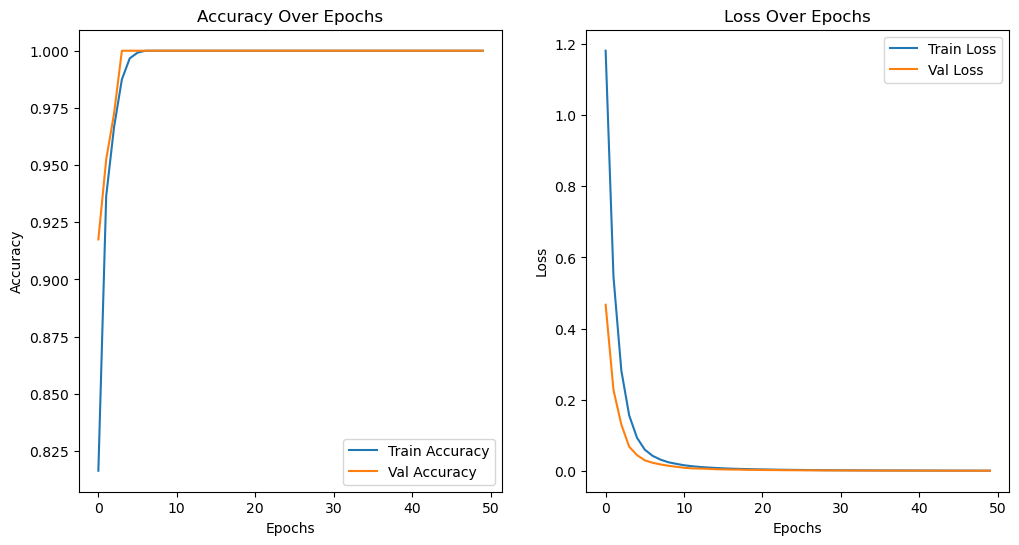

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
data = pd.read_csv("synthetic_data.csv")  # Make sure you have this dataset

# Feature extraction
X = data[["SpO2", "HeartRate"]].values
y = data["Label"].values

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training, validation, and testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Define the model
def build_model(input_shape, num_classes):
    """
    Build a CNN-based model suitable for 2D input data (e.g., SpO2 and Heart Rate).
    
    Args:
        input_shape (tuple): Input shape (e.g., (2,)).
        num_classes (int): Number of output classes.
    
    Returns:
        tf.keras.Model: Compiled model.
    """
    model = models.Sequential([
        layers.InputLayer(input_shape=input_shape),  # Input layer
        layers.Reshape((input_shape[0], 1, 1)),  # Reshaping to make it compatible with Conv layers
        
        layers.Conv2D(32, (1, 1), activation="relu"),  # Simple Conv layer
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(num_classes, activation="softmax")
    ])
    
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

input_shape = (2,)  # 2 features: SpO2 and Heart Rate
num_classes = 3  # Normal, Mild Hypoxia, Severe Hypoxia
model = build_model(input_shape, num_classes)

# Calculate class weights to handle imbalanced classes
class_weights = {0: 1., 1: 2., 2: 1.5}  # Adjust these values based on class distribution

# Train the model with class weights
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, class_weight=class_weights)

# Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Plot the training history for accuracy and loss
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [24]:
import numpy as np

# Assuming the trained model and scaler are available

def predict_class(spo2, heart_rate):
    """
    Classify the input SpO2 and Heart Rate values using the trained model.
    
    Args:
        spo2 (float): The SpO2 value entered by the user.
        heart_rate (float): The Heart Rate value entered by the user.
    
    Returns:
        str: The predicted classification (Normal, Mild Hypoxia, or Severe Hypoxia).
    """
    # Preprocess the input (scale it using the same scaler used for training)
    input_data = np.array([[spo2, heart_rate]])  # Shape (1, 2)
    input_data_scaled = scaler.transform(input_data)  # Scaling using the fitted scaler
    
    # Predict the class (Normal, Mild Hypoxia, Severe Hypoxia)
    prediction = model.predict(input_data_scaled)
    predicted_class = np.argmax(prediction, axis=-1)  # Get the class index
    
    # Map the predicted class to the corresponding label
    class_labels = {0: "Normal", 1: "Mild Hypoxia", 2: "Severe Hypoxia"}
    predicted_label = class_labels[predicted_class[0]]
    
    return predicted_label

# Get user input for SpO2 and Heart Rate
spo2_input = float(input("Enter SpO2 (Oxygen Saturation) value: "))
heart_rate_input = float(input("Enter Heart Rate (beats per minute): "))

# Classify the input
prediction = predict_class(spo2_input, heart_rate_input)
print(f"The predicted classification is: {prediction}")


Enter SpO2 (Oxygen Saturation) value: 77
Enter Heart Rate (beats per minute): 55
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
The predicted classification is: Severe Hypoxia
